<a href="https://colab.research.google.com/github/Grendelsson/GitHub/blob/master/Heat_mapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script to build heatmap of feature pairs
This script takes a csv of 2 columns (with headings) with the first column representing features which may appear in combination within a session (e.g. search terms) and the second column being the Session ID custom dimension. The output is a heatmap showing the frequency of pairwise combinations of these features (symmetrical square matrix, main diagonal forced to zero)

## To run:
- Produce csv with described format
- Drag into 'Files' section on left (this remains in session storage, i.e. will be removed once this tab is closed)
- Define name of file in first cell and run
- Run second cell


In [1]:
file_name = "Page_sessionId.csv"

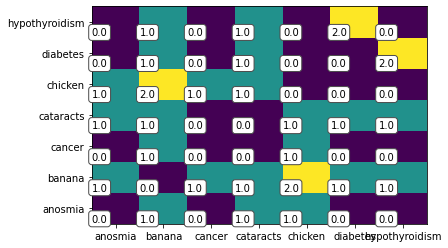

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#demo dataframe
#df=pd.DataFrame(data=[["a","a","a","a","a","a","a","b","c","c","c","d","d","e","f","f","f","f","f","f"],[1,1,5,2,3,6,4,8,7,3,4,6,8,2,3,1,8,5,9,2]]).transpose()

#read file
df=pd.read_csv(file_name,header=0)
df.columns=["cat","memb"]
#print(df.index.size)
#remove duplicates - if dataset is keywords and sessionIDs this would equate to unique searches of keyword
df.drop_duplicates(inplace=True)
#print(df.index.size)
df3=df.merge(df,on="memb")
#print(df3)
df4 = df3.groupby(["cat_x","cat_y"],as_index=False).count()
#print(df4)#.pivot(index="cat_x",columns="cat_y",values="memb"))
df5 = df4.pivot(index="cat_x",columns="cat_y",values="memb").fillna(0)
#set diagonal to 0
np.fill_diagonal(df5.values, 0)
#Plot heatmap
plt.pcolor(df5)
plt.yticks(np.arange(0.5, len(df5.index), 1), df5.index)
plt.xticks(np.arange(0.5, len(df5.columns), 1), df5.columns)
for (i, j), z in np.ndenumerate(df5):
    plt.text(j, i, '{:0.1f}'.format(z), ha='left', va='bottom',bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.show()